In [1]:
#Gaussian Naive Bayes method
import numpy as np
import pandas as pd 

import os
import pickle
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB #model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import time



start = time.time()

In [3]:
data = pd.read_csv('features_4.csv')

In [4]:
data

,url,domain_age,web_traffic,ratio_digits_url,domain_registration_length,status
0,http://www.crestonwood.com/router.php,-1,0,0.000000,45,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,5767,0,0.220779,77,phishing
2,https://support-appleld.com.secureupdate.duila...,4004,5828815,0.150794,14,phishing
3,http://rgipt.ac.in,-1,107721,0.000000,62,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,8175,8725,0.000000,224,legitimate
...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,5396,3980,0.000000,448,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,6728,0,0.023810,211,phishing
11427,https://www.facebook.com/Interactive-Televisio...,8515,8,0.142857,2809,legitimate
11428,http://www.mypublicdomainpictures.com/,2836,2455493,0.000000,85,legitimate


In [5]:
removeCols = ['url', 'status']
featuresCol = [i for i in data.columns if i not in removeCols]
StatusCol = 'status'
data[StatusCol] = data[StatusCol]
features, targets = data[featuresCol], data[StatusCol]


In [6]:
class Scaler():
    
    def __init__(self, scaler, feature_range=None):
        self.columns = None
        self.index = None
        self.feature_range = feature_range
        self.scaler = scaler()
        if (isinstance(self.scaler, sklearn.preprocessing._data.MinMaxScaler)
            and isinstance(self.feature_range, tuple)):
            self.scaler = scaler(feature_range = self.feature_range)
        
    def fit(self, X):
        self.scaler = self.scaler.fit(X)
        return self
                
    def transform(self, X):
        scaled_X = self.scaler.transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            scaled_X = pd.DataFrame(scaled_X, index=self.index, columns=self.columns)
        return scaled_X
    
    def inverse_transform(self, X):
        inversed_X = self.scaler.inverse_transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            inversed_X = pd.DataFrame(inversed_X, index=self.index, columns=self.columns)
        return inversed_X


In [7]:
train_size = 0.85 
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, shuffle=True, train_size=train_size,
    random_state=42)

In [8]:
scaler = Scaler(StandardScaler) 
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [9]:
naive_bayes = GaussianNB() #call model
naive_bayes = naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_train)
print(f'\nTraining Accuracy: {round(accuracy_score(y_train, pred)*100, 4)}%')


Training Accuracy: 66.8142%


In [10]:
X_test = scaler.transform(X_test)
pred = naive_bayes.predict(X_test)

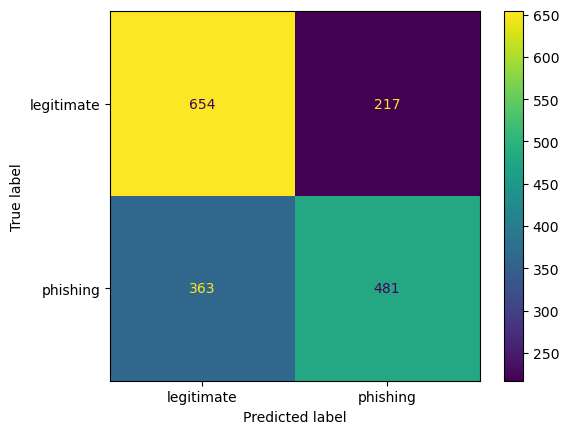

In [11]:
cm = confusion_matrix(y_test, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
display_cm.plot()
plt.show()


In [12]:
print(f'Accuracy: {round(accuracy_score(y_test, pred)*100, 4)}%')
end = time.time()
finalTime = end - start
print("Total time (in seconds): " + str(finalTime))


Accuracy: 66.1808%
Total time (in seconds): 187.05367493629456


In [13]:
#RF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
pd.set_option('display.max_rows', 500)
data.isna().sum()



url                           0
domain_age                    0
web_traffic                   0
ratio_digits_url              0
domain_registration_length    0
status                        0
dtype: int64

In [15]:
original_dataset = data.copy()


In [16]:
class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)


In [17]:
corr_matrix = original_dataset.corr()

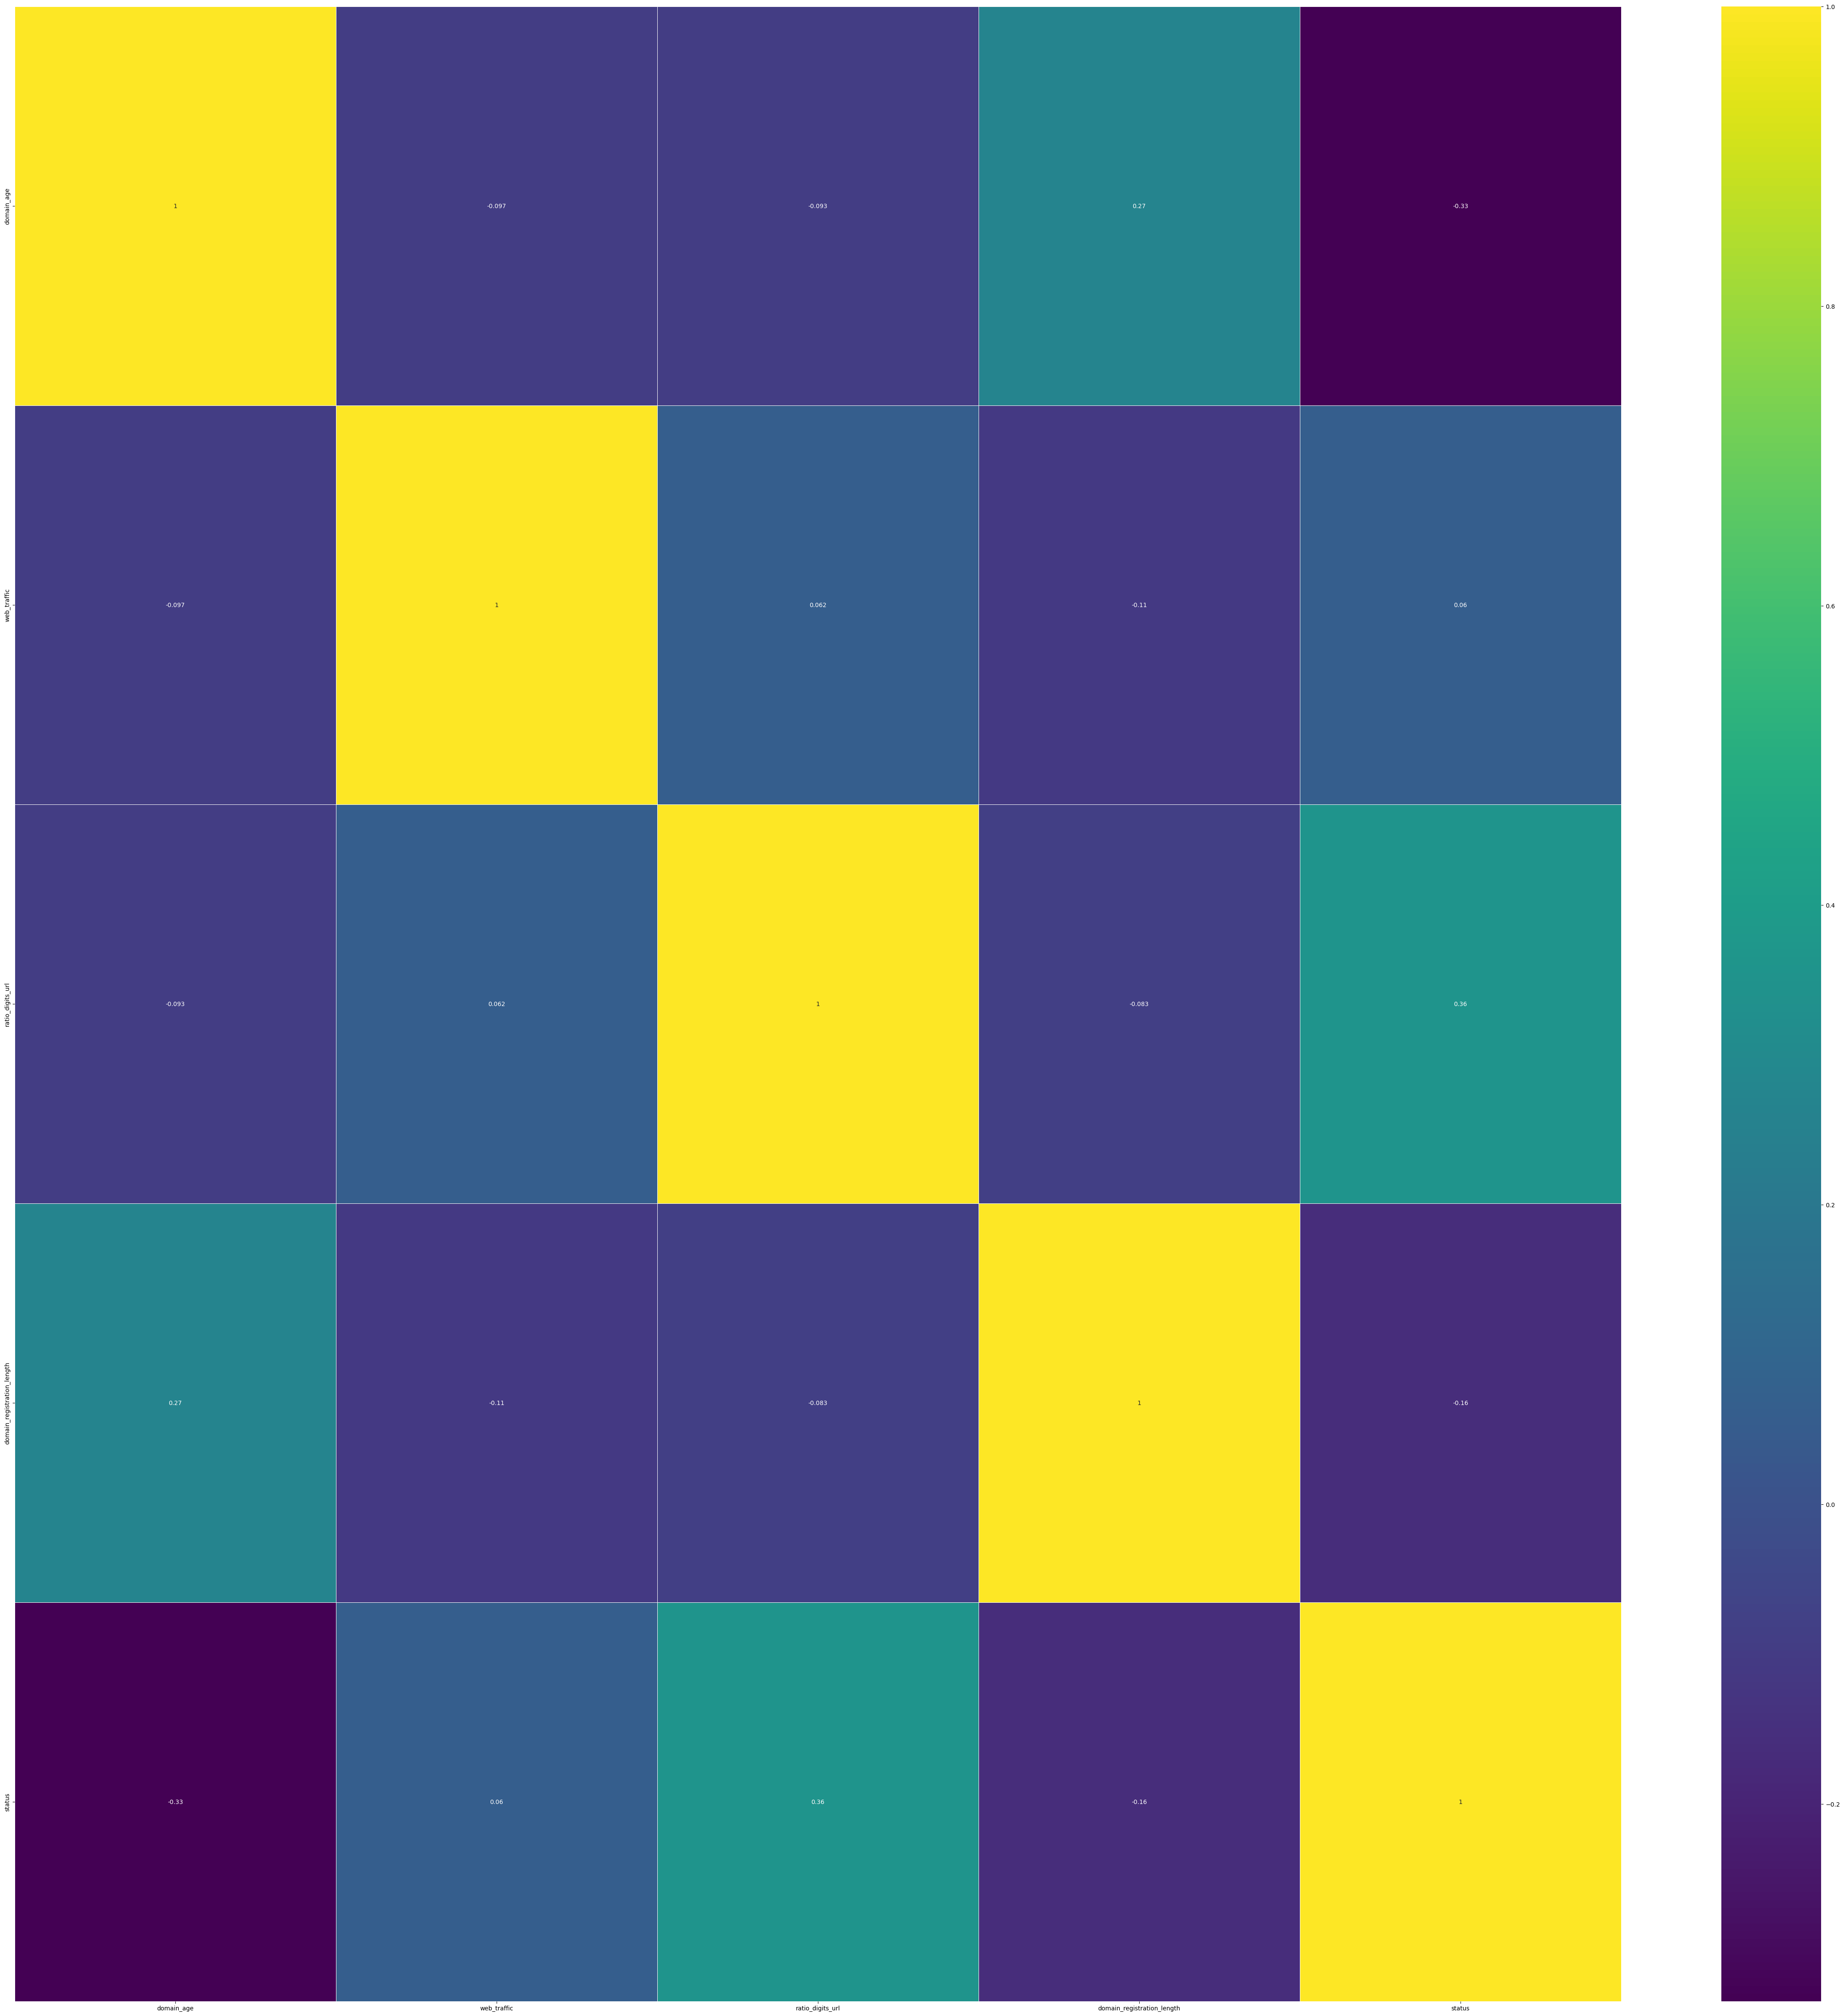

In [18]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [19]:
corr_matrix.shape

(5, 5)

In [20]:
corr_matrix['status']

domain_age                   -0.331889
web_traffic                   0.060388
ratio_digits_url              0.356395
domain_registration_length   -0.161719
status                        1.000000
Name: status, dtype: float64

In [21]:
status_corr = corr_matrix['status']
status_corr.shape


(5,)

In [22]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [23]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('domain_age', ['-0.331889']),
 ('ratio_digits_url', ['0.356395']),
 ('status', ['1.000000'])]

In [24]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features


['domain_age', 'ratio_digits_url']

In [25]:
X_selected = original_dataset[selected_features]
X_selected

,domain_age,ratio_digits_url
0,-1,0.000000
1,5767,0.220779
2,4004,0.150794
3,-1,0.000000
4,8175,0.000000
...,...,...
11425,5396,0.000000
11426,6728,0.023810
11427,8515,0.142857
11428,2836,0.000000


In [26]:
X_selected.shape

(11430, 2)

In [27]:
y = original_dataset['status']
y


0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                             )


model_random_forest.fit(X_train,y_train)


RandomForestClassifier(n_estimators=350, random_state=42)

In [32]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


In [33]:
def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)	

In [34]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=True)


model accuracy: 0.932305
Confusion matrix: 
 [[4436  122]
 [ 497 4089]]


In [35]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=False)

model accuracy: 0.776465
Confusion matrix: 
 [[913 244]
 [267 862]]


In [36]:
#MLP
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
from sklearn.feature_selection import SelectPercentile , chi2 , f_classif
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [37]:
X = data.copy()

Y = data["status"]

X.drop(["status" , "url"] , axis=1 , inplace=True)

Cols = X.columns;

Y = Y == "legitimate"

In [38]:
Scaler = StandardScaler(copy=True , with_mean=True , with_std=True)
X = Scaler.fit_transform(X)


In [39]:
SP = SelectPercentile(score_func=f_classif , percentile=60)

In [40]:
X = SP.fit_transform(X , Y)


In [41]:
print("Number Of Features : " , Cols[SP.get_support()])

Number Of Features :  Index(['domain_age', 'ratio_digits_url'], dtype='object')


In [42]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.20 , random_state=10 , shuffle=True)


In [43]:
Model = MLPClassifier(solver='adam' , alpha=0.01 , hidden_layer_sizes=(100 , 100 , 100 , 100) , max_iter=100 , random_state=44)
Ans1 = Model.fit(x_train , y_train)
print("Score Model For Training Data : " , Model.score(x_train , y_train))

Score Model For Training Data :  0.7458442694663167


C:\Users\18145\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
YPred = Ans1.predict(x_test)
conf_matrix = confusion_matrix(y_test ,YPred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_test,YPred)))
print("Recall of the MLP    :\t"+str(recall_score(y_test,YPred)))
print("F1 Score of the MLP :\t"+str(f1_score(y_test,YPred)))
print("Accuracy Score of the MLP :\t"+str(accuracy_score(y_test,YPred)))


Confusion Matrix of the Test Set
-----------
[[687 447]
 [161 991]]
Precision of the MLP :	0.6891515994436718
Recall of the MLP    :	0.8602430555555556
F1 Score of the MLP :	0.7652509652509653
Accuracy Score of the MLP :	0.7340332458442694


In [45]:
#XGBoost
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data.columns




from sklearn.model_selection import train_test_split


In [48]:
y = data.status
X = data.drop(['status'], axis=1)

In [49]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [50]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]


In [51]:
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


In [52]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()



In [53]:
numerical_transformer = SimpleImputer(strategy='constant')



In [54]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [56]:
print(data.describe)

<bound method NDFrame.describe of                                                      url  domain_age  \
0                  http://www.crestonwood.com/router.php          -1   
1      http://shadetreetechnology.com/V4/validation/a...        5767   
2      https://support-appleld.com.secureupdate.duila...        4004   
3                                     http://rgipt.ac.in          -1   
4      http://www.iracing.com/tracks/gateway-motorspo...        8175   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter        5396   
11426  http://www.budgetbots.com/server.php/Server%20...        6728   
11427  https://www.facebook.com/Interactive-Televisio...        8515   
11428             http://www.mypublicdomainpictures.com/        2836   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...          -1   

       web_traffic  ratio_digits_url  domain_registration_length      status  
0                0    

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [58]:
y_valid = le.fit_transform(y_valid)

In [59]:
print(y_train)

[0 1 0 ... 1 1 1]


In [60]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [61]:
model = xgb.XGBClassifier()

In [62]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [63]:
my_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['domain_age', 'web_traffic',
                                                   'ratio_digits_url',
                                                   'domain_registration_length']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model',
                 XGBClassifier(base_scor...
                               

In [64]:
preds = my_pipeline.predict(X_valid)
print(accuracy_score(preds,y_valid))

0.8775153105861767
